In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
I = np.arange(0,4.4,0.4)
print(I)

[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]


[0.6 1.3 3.1 3.9 4.6 5.1 6.3 7.1 7.8 8.5]
[ 36.  78. 186. 234. 276. 306. 378. 426. 468. 510.]


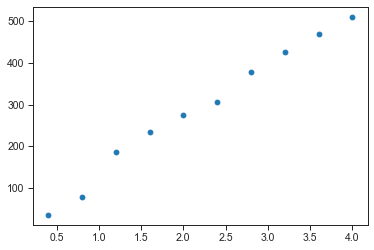

In [38]:
angle = np.array([133.2, 133.8,134.5,136.3,137.1,137.8,138.3,139.5,140.3,141,141.7,])
# convert to minutes. The above values are in degrees
print(angle[1:]-angle[0])

angle = angle*60
# compute delta_theta
delta_theta = angle[1:]-angle[0]
print(delta_theta)

plt.plot(I[1:],delta_theta,'o')

In [4]:
I_diff = I[1:]-I[0]
H = np.pi*167.2*I_diff

In [5]:
H

array([ 210.10971667,  420.21943334,  630.32915002,  840.43886669,
       1050.54858336, 1260.65830003, 1470.7680167 , 1680.87773338,
       1890.98745005, 2101.09716672])

In [44]:
delta_theta/(H*12)

array([0.01427825, 0.01546811, 0.02459033, 0.02320216, 0.02189332,
       0.02022753, 0.02141738, 0.02111992, 0.02062415, 0.02022753])

In [39]:
def linfit(x,m,c):
    return m*x + c

popt, pcov = curve_fit(linfit, H*12, delta_theta)

print(popt[0])
# error in slope
print(np.sqrt(pcov[0,0]))

slope = popt[0]
intercept = popt[1]

0.020811637716923626
0.0008502518149461867


In [8]:
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.2)
# change font style
plt.rcParams['font.family'] = 'sans'

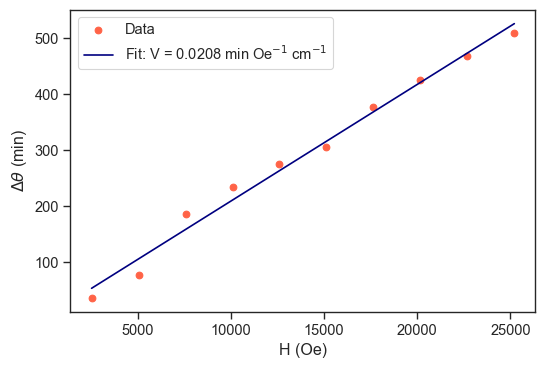

In [9]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(H*12,delta_theta, label='Data', color='tomato')
plt.plot(H*12, slope*H*12 + intercept, label='Fit: V = %.4f min Oe$^{-1}$ cm$^{-1}$' %slope, color='navy')  

plt.legend()
plt.xlabel('H (Oe)')
plt.ylabel('$\Delta \\theta$ (min)')
plt.savefig('VerdetConstant.pdf', dpi=300, bbox_inches='tight')

In [26]:
intensity = np.array([0.6,2.0,4.5,7.8,12.3,17.6,23.9,31,39.4,48.3]) 

In [41]:
# calculte the rotation angle phi = V*H*l
phi = slope*H*12/60 #in degrees
print(phi)

# convert to radians
phi = phi*np.pi/180

print(phi)

[0.87454545 1.74909091 2.62363636 3.49818182 4.37272727 5.24727273
 6.12181818 6.99636364 7.87090909 8.74545455]
[0.0152637  0.0305274  0.04579109 0.06105479 0.07631849 0.09158219
 0.10684588 0.12210958 0.13737328 0.15263698]


[2.08130311e+03 3.12561038e-04 5.79077383e-02]
[1.49288083e+01 6.25714904e-04 9.57975571e-02]


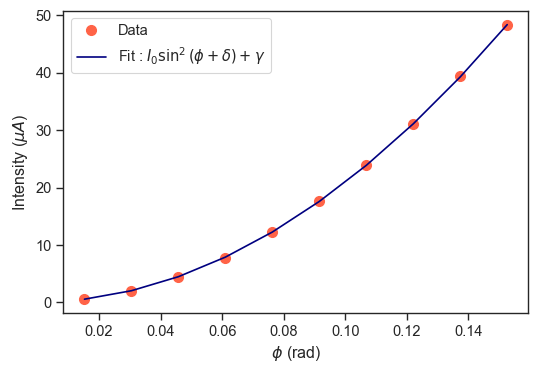

In [43]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(phi, intensity, 'o', color='tomato', label='Data', ms=7)
# fit the curve to A*sin^2(phi + delta)
from scipy.optimize import curve_fit

def func(x, A, delta, D):
    return A*np.sin(x + delta)**2 + D

popt, pcov = curve_fit(func, phi, intensity, p0=(10, 0, 0))
print(popt)

# print error
perr = np.sqrt(np.diag(pcov))
print(perr)


plt.plot(phi, func(phi, *popt), color='navy', label="Fit : $I_0 \\sin^2(\\phi + \\delta) + \\gamma$")
plt.xlabel('$\phi$ (rad)')
plt.ylabel('Intensity ($\\mu A$)')
plt.legend()

plt.savefig('Malus.pdf', dpi=300, bbox_inches='tight')